In [1]:
import sys

sys.path.append('..')
from src.utils.factory import read_yaml
from src.dataset.dataset import MakeDataset
from src.models.networks import read_model
from src.ntk.generate import generate_ntk
from src.tools.train import train
from src.ntk.learning_curve import LearningCurve
from src.utils.visualize import visualize

/home/kwatanabe/miniconda3/envs/rnf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read Setting

In [2]:
cfg = read_yaml(fpath='../src/config/config.yaml')

### Prepare dataset

In [3]:
database = MakeDataset(cfg)

# get data (numpy.array)
ar_X_tr, ar_X_te, ar_y_tr, ar_y_te = database.get_array()

# get data (torch.tensor)
te_X_tr, te_X_te, te_y_tr, te_y_te = database.get_tensor()

### Read model

In [4]:
net = read_model(cfg)

### Calculate optimal learning rate

In [5]:
_, lr = generate_ntk(net, 0, te_X_tr, te_X_te, cfg, calc_lr=True)

100%|██████████| 80/80 [00:00<00:00, 176.19it/s]


### Train model

In [6]:
f_train_0, f_test_0, results = train(cfg, net, lr, database)

Epoch[1/1000], TrainLoss: 0.1398, TestLoss: 0.1376, TestAcc: 0.1500
Epoch[2/1000], TrainLoss: 0.1394, TestLoss: 0.1372, TestAcc: 0.1500
Epoch[3/1000], TrainLoss: 0.1389, TestLoss: 0.1367, TestAcc: 0.1500
Epoch[4/1000], TrainLoss: 0.1385, TestLoss: 0.1363, TestAcc: 0.1500
Epoch[5/1000], TrainLoss: 0.1380, TestLoss: 0.1359, TestAcc: 0.1500
Epoch[6/1000], TrainLoss: 0.1376, TestLoss: 0.1354, TestAcc: 0.1500
Epoch[7/1000], TrainLoss: 0.1372, TestLoss: 0.1350, TestAcc: 0.1500
Epoch[8/1000], TrainLoss: 0.1367, TestLoss: 0.1346, TestAcc: 0.1500
Epoch[9/1000], TrainLoss: 0.1363, TestLoss: 0.1341, TestAcc: 0.1500
Epoch[10/1000], TrainLoss: 0.1359, TestLoss: 0.1337, TestAcc: 0.1500
Epoch[11/1000], TrainLoss: 0.1354, TestLoss: 0.1333, TestAcc: 0.1500
Epoch[12/1000], TrainLoss: 0.1350, TestLoss: 0.1328, TestAcc: 0.1500
Epoch[13/1000], TrainLoss: 0.1346, TestLoss: 0.1324, TestAcc: 0.1500
Epoch[14/1000], TrainLoss: 0.1342, TestLoss: 0.1320, TestAcc: 0.1500
Epoch[15/1000], TrainLoss: 0.1337, TestLoss

### Generate NTK

In [7]:
NTK_train, NTK_test = generate_ntk(net, 0, te_X_tr, te_X_te, cfg)

100%|██████████| 20/20 [00:02<00:00,  8.89it/s]


### Make learning curve by using NTK

In [8]:
lc_base = LearningCurve(cfg, lr, NTK_train, ar_y_tr, f_train_0, f_test_0)
ntk_train_results = lc_base.train_curve()
ntk_test_results = lc_base.test_curve(NTK_test, ar_y_te)

100%|██████████| 1000/1000 [00:00<00:00, 5518.12it/s]


In [9]:
# merge two dicts
ntk_results = ntk_train_results | ntk_test_results

### Visualize

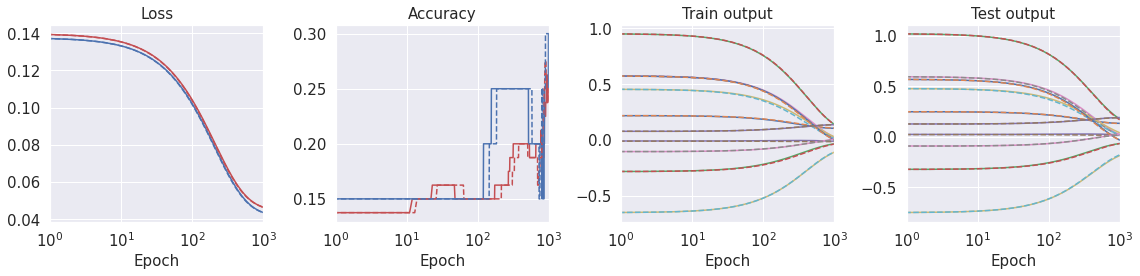

In [10]:
visualize(cfg, results, ntk_results, ar_y_tr, ar_y_te, 0)